In [ ]:
import pandas as pd
import numpy as np
from math import *
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [ ]:
load_data = pd.read_excel("/content/Load Data in kW (4).xlsx",header = None)
load_data.head()

,0
0,5551.82208
1,4983.17184
2,4888.39680
3,5072.95872
4,5196.25980


In [ ]:
load_data.describe()

,0
count,2184.000000
mean,6393.230623
std,17139.102597
min,3377.919600
25%,5258.767680
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2184 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fd1f7d75d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd1f7d8bf50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1f7d167d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1f7d16090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd1f7d7c4d0>,
  <matplotlib.lines.Line2D at 0x7fd1f7d8b090>]}

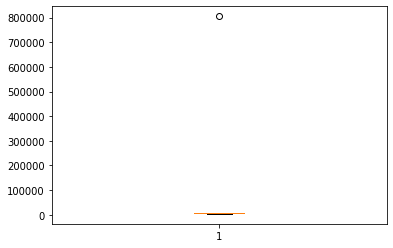

In [ ]:
plt.boxplot(load_data.iloc[:,0])

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([929]),)


In [ ]:
load_data.iloc[929,0] = load_data.iloc[928,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fd1f7799890>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd1f779c890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd1f77a28d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fd1f77a2390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd1f7799dd0>,
  <matplotlib.lines.Line2D at 0x7fd1f779c350>]}

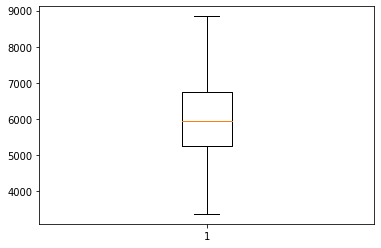

In [ ]:
plt.boxplot(load_data.iloc[:,0])

In [ ]:
data = minmax_scale(load_data.iloc[:,0])
print(data)

[0.39787738 0.29380046 0.27645431 ... 0.24629825 0.32438447 0.65165045]


In [ ]:
x = []
y = []
for i in range(1,len(data)-24):
  temp = [data[i],data[i+23]]
  x.append(temp)
  y.append(data[i+24])

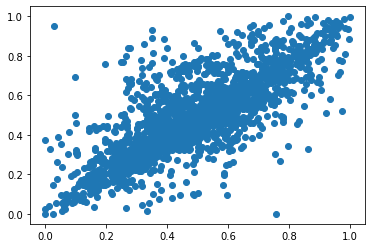

In [ ]:
x = np.array(x)
y = np.array(y)

plt.scatter(x[:,[1]],y)

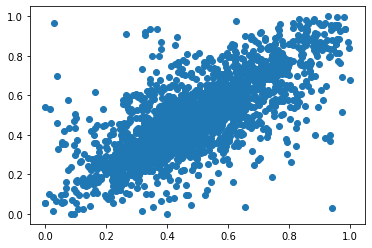

In [ ]:
plt.scatter(x[:,[0]],y)

In [ ]:
print(x[[1][0]][0])
print(x[[1][0]][1])
print(y[[1]][0])

print(x)
print(y)

0.2764543094348234
0.25579869333257255
0.24450087016062294
[[0.29380046 0.28430002]
 [0.27645431 0.25579869]
 [0.31023366 0.24450087]
 ...
 [0.68414596 0.21779692]
 [0.51467861 0.24629825]
 [0.41730621 0.32438447]]
[0.25579869 0.24450087 0.23996462 ... 0.24629825 0.32438447 0.65165045]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

1727
1727
432
432


In [ ]:
def gradientm0(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x0

def gradientm1(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)*x1

def gradientc(y,x0,x1,m0,m1,c):
    return -1*(y-m0*x0-m1*x1-c)

def error(x,y,m0,m1,c):
  number_of_samples = len(x)
  sum = 0
  for i in range(number_of_samples):
    sum = sum + pow((y[[i]][0] - m0*x[[i][0]][0] - m1*x[[i][0]][1] - c), 2)
  error_value = 1*0.5*(1/number_of_samples)*sum
  return error_value

In [ ]:
learning_rate = 0.01
epochs = 1000

m0 = 1
m1 = 1
c = 1

Gm0 = 0
Gm1 = 0
Gc = 0
gama = 0.9
e = pow(10,-6)
number_of_samples = len(x_train)
error_list = []

In [ ]:
for i in range(epochs):
    for j in range(number_of_samples):
        gradient_m0 = gradientm0(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_m1 = gradientm1(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)
        gradient_c = gradientc(y_train[[j]][0],x_train[[j][0]][0],x_train[[i][0]][1],m0,m1,c)

        Gm0 = gama*Gm0 + (1-gama)*gradient_m0**2
        Gm1 = gama*Gm1 + (1-gama)*gradient_m1**2
        Gc = gama*Gc + (1-gama)*gradient_c**2

        learning_rate_m0 = learning_rate/sqrt(Gm0+e)
        learning_rate_m1 = learning_rate/sqrt(Gm1+e)
        learning_rate_c = learning_rate/sqrt(Gc+e)
        
        deltam0 = -1*learning_rate_m0*gradient_m0
        deltam1 = -1*learning_rate_m1*gradient_m1
        deltac = -1*learning_rate_c*gradient_c
        
        m0 = m0 + deltam0
        m1 = m1 + deltam1
        c = c + deltac
    err = error(x,y,m0,m1,c)
    print(err)
    error_list.append(err)

0.009818504489780227
0.010186272153853307
0.009568499115538245
0.01019986815262314
0.010487316584590718
0.009100773802744213
0.01017488343591696
0.008856142478073247
0.009203529793189285
0.009605796633439101
0.01062390031675631
0.010549077072773664
0.009495023889874181
0.009064201510944276
0.00936023761772206
0.008777916230522955
0.00997312294542718
0.008713701939015148
0.009022422854225864
0.009443135099872962
0.008838382445064222
0.008775879527392066
0.01038360366060374
0.009897453957903894
0.010368399346310809
0.008985062326715558
0.0090471206519109
0.00911063003753216
0.010096811858382094
0.010274008513804412
0.009160439097525588
0.009092907853097453
0.00902115138650917
0.009318554877373098
0.008772813880447025
0.009765206063112082
0.009694653815871626
0.009566560982648567
0.009650821723425563
0.00835641241595353
0.008390556771098501
0.009574160798989722
0.010119088630352015
0.009608171303650838
0.00878402463543611
0.009585054086059287
0.009504075576178987
0.009364119437719256
0.00

Text(0.5, 1.0, 'error graph in case of SGD with RMS')

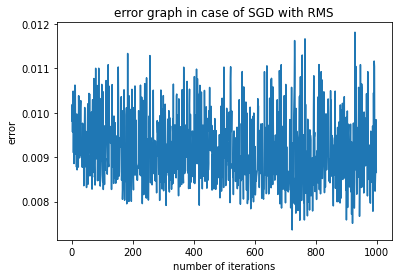

In [ ]:
x1 = range(epochs)
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("error graph in case of SGD with RMS")

In [ ]:
print(m0,m1,c)

0.7259421839090278 0.09522047261115771 0.040930330914318684


In [ ]:
train_error = error(x_train,y_train,m0,m1,c)
test_error = error(x_test,y_test,m0,m1,c)

print("train error : ",train_error)
print("test error : ",test_error)

train error :  0.00833360372151582
test error :  0.009948293910690667


In [ ]:
input_load0 = float(input("enter yesterday load at this time : "))
input_load1 = float(input("enter load at previous hour : "))

max_value = 8841.669480
min_value = 3377.919600

input_load0 = (input_load0 - min_value)/(max_value-min_value)
input_load1 = (input_load1 - min_value)/(max_value-min_value)
output_load = input_load0*m0 + input_load1*m0 + c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5000
enter load at previous hour : 5500
predicted load for this hour is :  6319.596958680042
